In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Q1

In [2]:
np.identity(3)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Q2

In [3]:
fuel_data = pd.read_csv('fuel_ferc1.csv')

In [4]:
fuel_data.isnull().any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                        True
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [5]:
fuel_data['fuel_unit'].dtype

#Since variable is a categorical we use mode imputation

dtype('O')

### Q3

In [6]:
matrix = fuel_data.corr()
correlation = matrix['fuel_cost_per_unit_burned']
correlation.sort_values(ascending=False)

fuel_cost_per_unit_burned       1.000000
report_year                     0.013599
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
fuel_mmbtu_per_unit            -0.010034
fuel_qty_burned                -0.018535
utility_id_ferc1               -0.037863
Name: fuel_cost_per_unit_burned, dtype: float64

In [7]:
'''Answer: fuel_qty_burned and fuel_mmbtu_per_unit '''  

'Answer: fuel_qty_burned and fuel_mmbtu_per_unit '

### Q4

In [8]:
#Groupby fuel type and year of report, output the sum of the cost of fuel per unit burned 
fuel_data.groupby(['fuel_type_code_pudl','report_year'])[['fuel_cost_per_unit_burned']].sum().head()

fuel_cost_per_unit_burned
fuel_type_code_pudl report_year                           
coal                1994                         14984.572
                    1995                         14571.785
                    1996                         12694.803
                    1997                         43742.178
                    1998                         11902.597

In [9]:
#total cost for both years 1994 and 1998 respectively
cost_in_1994 = 14984.572
cost_in_1998 = 11902.597

#Calculate the percentage change
diff = cost_in_1998 - cost_in_1994
pct_change = (diff / cost_in_1994) * 100
pct_change

-20.567654518260518

### Q5

In [10]:
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().nlargest()

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64

### Q6

In [11]:
fuel_data['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [12]:
'''Answer: 10.600220 and 17.006000 '''

'Answer: 10.600220 and 17.006000 '

### Q7

In [13]:
print('Skewness for the fuel quantity burned: ',fuel_data['fuel_qty_burned'].skew())
print('Kurtosis for the fuel quantity burned:', fuel_data['fuel_qty_burned'].kurtosis())

Skewness for the fuel quantity burned:  15.851495469109503
Kurtosis for the fuel quantity burned: 651.3694501337732


### Q8

In [14]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [15]:
num_of_missing_values = fuel_data['fuel_unit'].isnull().sum()
total_num_rows = len(fuel_data)
(num_of_missing_values / total_num_rows ) * 100

0.609694136774718

In [16]:
''' ANSWER:  Feature: fuel_unit Total: 180 Percent: 0.610 '''

' ANSWER:  Feature: fuel_unit Total: 180 Percent: 0.610 '

### Q9

In [17]:
fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().nsmallest()

fuel_type_code_pudl
gas       13.659397
other     18.253856
waste     19.518122
coal      67.421830
oil      168.877086
Name: fuel_cost_per_unit_burned, dtype: float64

C:\Users\Adbeel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(1, 12000)

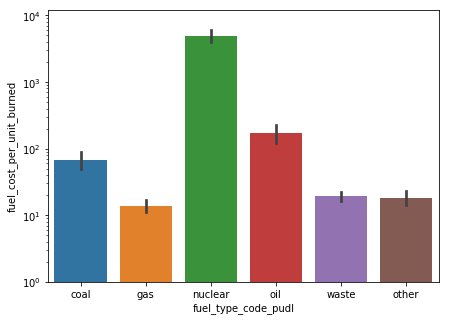

In [18]:
plt.figure(figsize=(7,5))
g=sns.barplot(x=fuel_data['fuel_type_code_pudl'], y=fuel_data['fuel_cost_per_unit_burned'] )
g.set_yscale('log')
g.set_ylim(1,12000)

### Q10

In [19]:
A =[1,2,3,4,5,6]
B =[13,21,34]
print(A.extend(B))
print(A.append(B))

None
None
